<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/04_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import math
import phik
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from phik import resources
from phik.binning import bin_data
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.datasets import fetch_openml
from phik.report import plot_correlation_matrix


%matplotlib inline
# Load the "Adult" dataset from OpenML
adult = fetch_openml(name='adult',
                     version=2,
                     as_frame=True)
adult_data = adult.frame

# Data Preparation: Encode binary variables and filter relevant columns
adult_df = adult_data[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'sex', 'class', 'race']].copy()

In [2]:
adult_data.to_csv('adult.csv')

In [3]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race
0,25,7,40,0,0,Male,<=50K,Black
1,38,9,50,0,0,Male,<=50K,White
2,28,12,40,0,0,Male,>50K,White
3,44,10,40,7688,0,Male,>50K,Black
4,18,10,30,0,0,Female,<=50K,White


In [4]:
df_2x2 = pd.crosstab(adult_df['sex'], adult_df['class'])
df_2x2

class,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


In [5]:
a = df_2x2.iloc[0,0]
b = df_2x2.iloc[0,1]
c = df_2x2.iloc[1,0]
d = df_2x2.iloc[1,1]

In [6]:
numerator = (a*d - b*c)
denominator = np.sqrt(np.longdouble(a+b) * np.longdouble(c+d) * np.longdouble(a+c) * np.longdouble(b+d))
phi_coefficient = numerator / denominator
phi_coefficient

0.2146280345639280344

In [7]:
def calculate_phi(x, y):
  df_2x2 = pd.crosstab(x, y)
  a = df_2x2.iloc[0,0]
  b = df_2x2.iloc[0,1]
  c = df_2x2.iloc[1,0]
  d = df_2x2.iloc[1,1]
  numerator = (a*d - b*c)
  denominator = np.sqrt(np.longdouble(a+b) * np.longdouble(c+d) * np.longdouble(a+c) * np.longdouble(b+d))
  return (numerator / denominator)

In [8]:
calculate_phi(adult_df['sex'], adult_df['class'])

0.2146280345639280344

In [9]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race
0,25,7,40,0,0,Male,<=50K,Black
1,38,9,50,0,0,Male,<=50K,White
2,28,12,40,0,0,Male,>50K,White
3,44,10,40,7688,0,Male,>50K,Black
4,18,10,30,0,0,Female,<=50K,White


In [10]:
adult_df['age'].describe()

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [11]:
def age_type(x):
  if x < 18:
    return 'young'
  elif x >= 18 and x <= 30:
    return 'adult'
  elif x > 30 and x <= 50:
    return 'middle_aged'
  elif x > 50 and x <= 70:
    return 'senior'
  else:
    return 'old'

adult_df['age_type'] = adult_df['age'].agg(age_type)

<ipython-input-11-0738830d4abd>:13: FutureWarning: using <function age_type at 0x7f31acc78310> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  adult_df['age_type'] = adult_df['age'].agg(age_type)


In [12]:
calculate_phi(adult_df['age_type'], adult_df['class'])

0.30606589295137763042

In [13]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
0,25,7,40,0,0,Male,<=50K,Black,adult
1,38,9,50,0,0,Male,<=50K,White,middle_aged
2,28,12,40,0,0,Male,>50K,White,adult
3,44,10,40,7688,0,Male,>50K,Black,middle_aged
4,18,10,30,0,0,Female,<=50K,White,adult


In [14]:
contingency_table_phi = pd.crosstab(adult_df['sex'], adult_df['class'])

chi2_phi, _, _, _ = chi2_contingency(contingency_table_phi)
phi_coefficient = math.sqrt(chi2_phi / adult_df.shape[0])
phi_coefficient

0.21457706493774975

In [15]:
calculate_phi(adult_df['class'], adult_df['sex'])

0.2146280345639280344

In [16]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
0,25,7,40,0,0,Male,<=50K,Black,adult
1,38,9,50,0,0,Male,<=50K,White,middle_aged
2,28,12,40,0,0,Male,>50K,White,adult
3,44,10,40,7688,0,Male,>50K,Black,middle_aged
4,18,10,30,0,0,Female,<=50K,White,adult


In [17]:
race = adult_df['race']
clas = adult_df['class']

In [18]:
cros = pd.crosstab(race, clas)
cros['total'] = cros.sum(axis=1)
cros.loc['total'] = cros.sum()
cros

class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1110,409,1519
Black,4119,566,4685
Other,356,50,406
White,31155,10607,41762
total,37155,11687,48842


In [19]:
def E(rt, ct, n):
  return (rt * ct) / n

In [20]:
e_cros = cros.copy()

In [21]:
columns = e_cros.columns

In [22]:
e_cros

class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1110,409,1519
Black,4119,566,4685
Other,356,50,406
White,31155,10607,41762
total,37155,11687,48842


In [23]:
for col in columns:
  if col == 'total':
    continue
  for i in e_cros.index:
    if i == 'total':
      continue
    row_total = e_cros.loc[i, 'total']
    col_total = e_cros.loc['total', col]
    n = e_cros.loc['total', 'total']
    e_cros.loc[i, col] = E(row_total, col_total, n)

e_cros

<ipython-input-23-cdf56ba05e03>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '357.53757012407357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  e_cros.loc[i, col] = E(row_total, col_total, n)
<ipython-input-23-cdf56ba05e03>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '112.46242987592646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  e_cros.loc[i, col] = E(row_total, col_total, n)


class,<=50K,>50K,total
race,,,
Amer-Indian-Eskimo,357.537570,112.462430,470
Asian-Pac-Islander,1155.530998,363.469002,1519
Black,3563.964928,1121.035072,4685
Other,308.851603,97.148397,406
White,31769.114901,9992.885099,41762
total,37155.000000,11687.000000,48842


In [24]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
0,25,7,40,0,0,Male,<=50K,Black,adult
1,38,9,50,0,0,Male,<=50K,White,middle_aged
2,28,12,40,0,0,Male,>50K,White,adult
3,44,10,40,7688,0,Male,>50K,Black,middle_aged
4,18,10,30,0,0,Female,<=50K,White,adult


In [25]:
race = adult_df.groupby('race')['age'].agg(list)

f_value, p_value = stats.f_oneway(*race)

print("F-value:", f_value)
print("P-value:", p_value)

<ipython-input-25-23a6e74c93a7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race = adult_df.groupby('race')['age'].agg(list)


F-value: 22.21171958495875
P-value: 2.405368250748736e-18


In [26]:
race

,age
race,
Amer-Indian-Eskimo,"[34, 19, 33, 50, 35, 57, 44, 31, 53, 37, 33, 4..."
Asian-Pac-Islander,"[40, 18, 34, 25, 55, 51, 28, 24, 37, 45, 36, 3..."
Black,"[25, 44, 29, 34, 23, 46, 52, 39, 49, 33, 22, 1..."
Other,"[46, 65, 21, 21, 64, 31, 41, 53, 64, 35, 27, 5..."
White,"[38, 28, 18, 34, 63, 24, 55, 65, 36, 26, 58, 4..."


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='race', ylabel='age'>

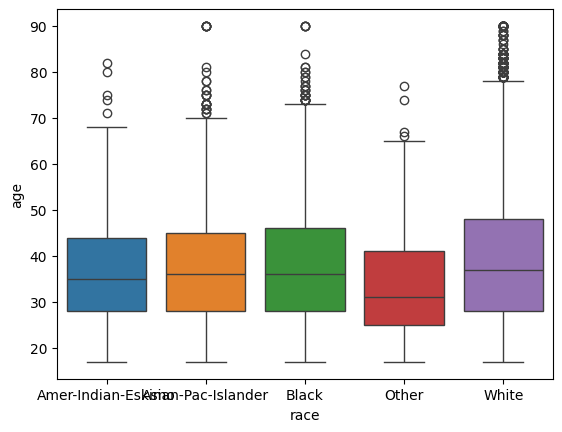

In [27]:
sns.boxplot(x='race', y='age', hue='race', data=adult_df)

<Axes: xlabel='race', ylabel='age'>

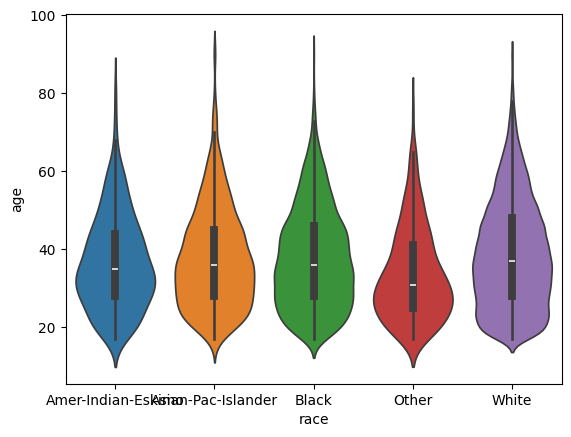

In [28]:
sns.violinplot(x='race', y='age', hue='race', data=adult_df)

In [29]:
def calculate_eta_squared(x, y):
  """Calculates eta-squared for association between two variables.

  Args:
      x: Series or array representing the independent variable.
      y: Series or array representing the dependent variable.

  Returns:
      The eta-squared value.
  """
  contingency_table = pd.crosstab(x, y)
  chi2, _, _, _ = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()
  eta_squared = chi2 / n
  return eta_squared


eta_squared_value = calculate_eta_squared(adult_df['race'], adult_df['class'])
print(f"Eta-squared for race and class: {eta_squared_value}")

Eta-squared for race and class: 0.009971464862979137


In [59]:
px.bar(adult_df, x='race', y='age', color='class')

In [30]:
adult_df.phik_matrix()

interval columns not set, guessing: ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']


,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class,race,age_type
age,1.000000,0.315181,0.436900,0.104562,0.123398,0.163535,0.411104,0.064078,0.976723
education-num,0.315181,1.000000,0.274150,0.188284,0.117095,0.118136,0.466485,0.165787,0.449353
hours-per-week,0.436900,0.274150,1.000000,0.108710,0.082224,0.315175,0.356961,0.140220,0.436124
capital-gain,0.104562,0.188284,0.108710,1.000000,0.013134,0.068245,0.376119,0.019245,0.075915
capital-loss,0.123398,0.117095,0.082224,0.013134,1.000000,0.083806,0.257450,0.029107,0.102608
sex,0.163535,0.118136,0.315175,0.068245,0.083806,1.000000,0.330645,0.092860,0.091164
class,0.411104,0.466485,0.356961,0.376119,0.257450,0.330645,1.000000,0.081282,0.237446
race,0.064078,0.165787,0.140220,0.019245,0.029107,0.092860,0.081282,1.000000,0.063289
age_type,0.976723,0.449353,0.436124,0.075915,0.102608,0.091164,0.237446,0.063289,1.000000


In [31]:
adult_data.phik_matrix()

interval columns not set, guessing: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
age,1.000000,0.190902,0.082337,0.280328,0.315181,0.503794,0.232954,0.474071,0.064078,0.163535,0.104562,0.123398,0.436900,0.092759,0.411104
workclass,0.190902,1.000000,0.047240,0.277488,0.180388,0.143079,0.420206,0.158470,0.095190,0.189269,0.094798,0.044622,0.205368,0.089482,0.217956
fnlwgt,0.082337,0.047240,1.000000,0.047199,0.059397,0.043334,0.043280,0.031935,0.166235,0.036472,0.000000,0.000000,0.041768,0.151041,0.013147
education,0.280328,0.277488,0.047199,1.000000,1.000000,0.193269,0.498828,0.248085,0.138741,0.116661,0.219408,0.096264,0.227268,0.418171,0.463799
education-num,0.315181,0.180388,0.059397,1.000000,1.000000,0.162251,0.500828,0.215776,0.165787,0.118136,0.188284,0.117095,0.274150,0.427829,0.466485
marital-status,0.503794,0.143079,0.043334,0.193269,0.162251,1.000000,0.331077,0.677753,0.128786,0.428657,0.064733,0.113360,0.229715,0.145186,0.418309
occupation,0.232954,0.420206,0.043280,0.498828,0.500828,0.331077,1.000000,0.341733,0.151450,0.551677,0.134609,0.084062,0.312872,0.219652,0.440690
relationship,0.474071,0.158470,0.031935,0.248085,0.215776,0.677753,0.341733,1.000000,0.143185,0.840726,0.117486,0.120812,0.299759,0.170126,0.623816
race,0.064078,0.095190,0.166235,0.138741,0.165787,0.128786,0.151450,0.143185,1.000000,0.092860,0.019245,0.029107,0.140220,0.703154,0.081282
sex,0.163535,0.189269,0.036472,0.116661,0.118136,0.428657,0.551677,0.840726,0.092860,1.000000,0.068245,0.083806,0.315175,0.063348,0.330645


interval columns not set, guessing: ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']


<Axes: >

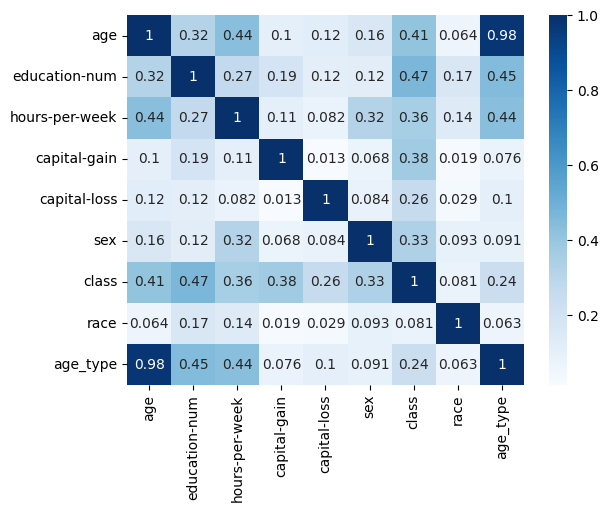

In [32]:
sns.heatmap(adult_df.phik_matrix(), annot=True, cmap='Blues')

<Axes: >

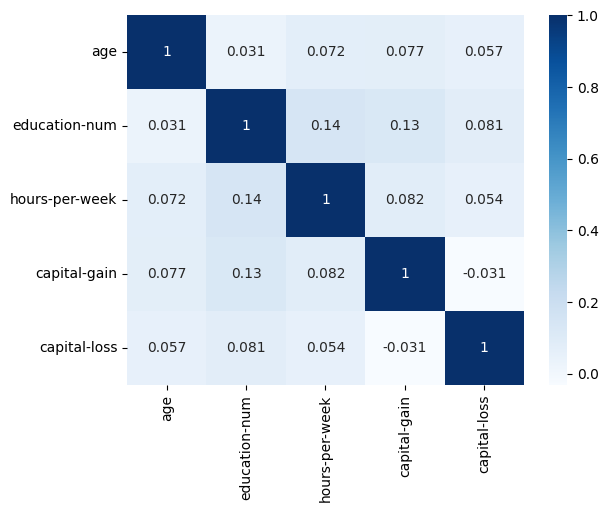

In [33]:
num = adult_df.select_dtypes(include=[np.number])
sns.heatmap(num.corr(), annot=True, cmap='Blues')

interval columns not set, guessing: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


<Axes: >

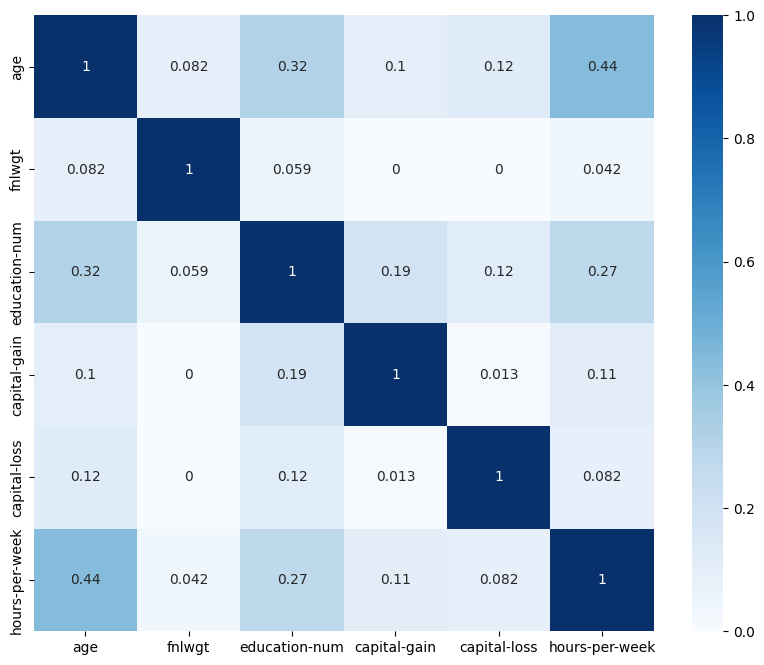

In [37]:
num = adult_data.select_dtypes(include=[np.number])

fig = plt.figure(figsize=(10, 8))
sns.heatmap(num.phik_matrix(), annot=True, cmap='Blues')

In [56]:
import pandas as pd
from phik import resources
from phik.report import plot_correlation_matrix
from sklearn.datasets import fetch_openml

# Load the "Adult" dataset from OpenML
adult = fetch_openml(name='adult', version=2, as_frame=True)
adult_data = adult.frame

# Specify interval columns and bin them using pd.cut
interval_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
binned_data = adult_data.copy()

# Bin each interval column into 10 categories
for col in interval_cols:
    binned_data[col] = pd.cut(adult_data[col], bins=10)

# Compute the Phi_k correlation matrix on the binned data
phik_matrix = binned_data.phik_matrix()

# Extract correlations with the 'class' column only and verify shape
class_correlations = phik_matrix[['class']].drop(index='class')
print("Correlation matrix shape:", class_correlations.values.shape)  # Check matrix dimensions

# Ensure the y_labels length matches the correlation values shape
y_labels = class_correlations.index.tolist()

# Plot the correlation with 'class'
plot_correlation_matrix(class_correlations.values.T,
                        x_labels=['class'],
                        y_labels=y_labels,
                        vmin=0, vmax=1,
                        color_map='Blues',
                        title=r'Correlation $\phi_K$ with "class"',
                        fontsize_factor=1.5,
                        figsize=(5, len(y_labels) * 0.5))  # Adjust figure size based on number of labels

plt.tight_layout()
plt.show()

Correlation matrix shape: (14, 1)


AssertionError: matrix_colors shape inconsistent with number of y-labels

In [51]:
num = adult_data.select_dtypes(include=[np.number]).columns
global_matrix = adult_data.global_phik(interval_cols=num)

/usr/local/lib/python3.10/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


In [52]:
plot_correlation_matrix(global_matrix.values,
                        x_labels=global_matrix.columns,
                        y_labels=global_matrix.index,
                        vmin=0, vmax=1, color_map='Blues',
                        title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))
plt.tight_layout()


AttributeError: 'tuple' object has no attribute 'values'